In [1]:
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
import pandas as pd
from scipy import optimize
import math
from math import pow 
from collections import defaultdict

# Buffon's needle problem 
The probability that a needle of length $D=L$ intersects (at least) one of equally spaced parallel lines, in distance $L$ from each other is equal to $\int_{0}^{\pi/2} \frac{1}{\pi/2} \frac{D\sin(\theta)}{L} d\theta = \frac{2}{\pi}$. This gives a straight-forward randomized algorithm to approximate $\pi$. 

100%|██████████| 10000/10000 [17:26<00:00,  9.55it/s]


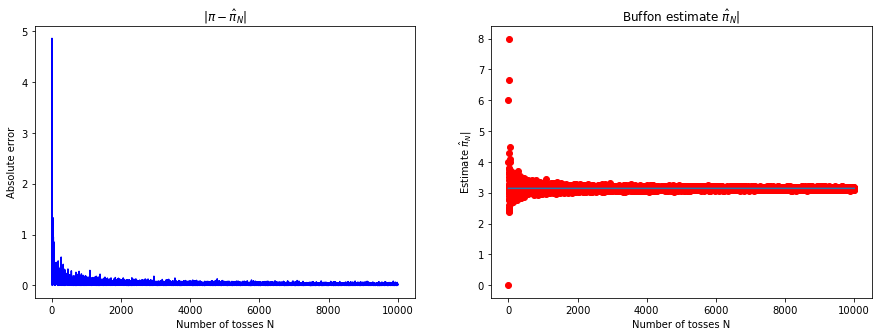

In [103]:
def toss_needle(N=1000):
    __author__ = "CE Tsourakakis (tsourolampis@gmail.com)" 
    intersections = 0 
    for i in range(N): 
        endpoint = np.zeros([2])
        center = np.random.uniform(0,1) #center of needle (0,center) 
        theta = np.random.uniform(0,np.pi/2) #angle 
        endpoint[0] = center - 0.5*np.sin(theta)
        endpoint[1] = center + 0.5*np.sin(theta) 
        if(np.min(endpoint) <= 0 or np.max(endpoint)>=1):
            intersections+=1 
    if(intersections>0):
        pi_estimate = 2*N/intersections
    else:
        pi_estimate = 0 
    
    err = np.abs( np.pi-pi_estimate)
    return  pi_estimate, err

def plot_error_buffon_needle(Nmax):
    __author__ = "CE Tsourakakis (tsourolampis@gmail.com)" 
    error = [] 
    estimates = [] 
    for n_tosses in tqdm(range(1,Nmax+1)): 
        pi_estimate, err = toss_needle(n_tosses)
        estimates.append(pi_estimate)
        error.append(err) 
    
    
    return estimates, error

Nmax = 10000
estimates, error = plot_error_buffon_needle(Nmax)


# plotting
fig, ax = plt.subplots(1,2, figsize = (15, 5))
ax[0].set(title = r'$|\pi-\hat{\pi}_N|$', xlabel = "Number of tosses N", ylabel = "Absolute error")
_tmp_0 = ax[0].plot(range(1,Nmax+1), error, color = "blue")
ax[1].set(title = r'Buffon estimate $\hat{\pi}_N|$', xlabel = "Number of tosses N", ylabel = r'Estimate $\hat{\pi}_N|$')
_tmp_1 = ax[1].scatter(range(1,Nmax+1), estimates, marker = 'o', color = 'red')
_tmp_2 = ax[1].plot(range(1,Nmax+1), np.pi*np.ones(Nmax), '-')



# Interest and bank fees 

In [35]:
def interest_bank(annual_interest_rate, initial_amount,how_many_years=30, year=2020):
    
    initdate = pd.to_datetime(str(year)) 
    amount_per_year = pd.Series(np.zeros(how_many_years+1), index = pd.date_range(initdate, periods=how_many_years+1, freq='Y') )
    amount_per_year[0] = initial_amount 
    for i in tqdm(range(how_many_years)):
        amount_per_year[i+1] = amount_per_year[i] *(1+annual_interest_rate)
    return amount_per_year
        

100%|██████████| 10/10 [00:00<00:00, 12379.88it/s]


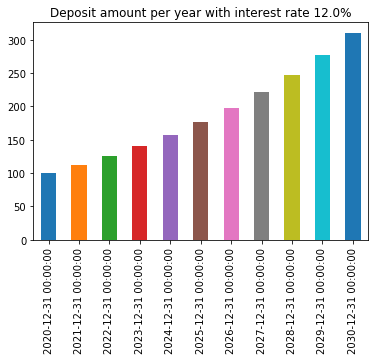

In [50]:
annual_interest_rate = 0.12
amount_per_year = interest_bank(annual_interest_rate,100,10)
amount_per_year.plot('bar', title='Deposit amount per year with interest rate '+repr(100*annual_interest_rate)+'%')

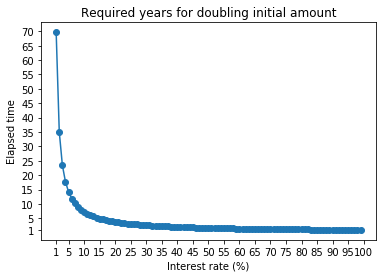

In [90]:
def interest(x,r):
    return math.pow((1+r),x)-2

def doubling_time():
    interests = np.arange(0.01,1,0.01)
    t = []
    for r in interests:
        t.append(optimize.newton(interest, 1,args=(r,)  ))
    
    fig= plt.plot(100*interests,t,'-o')
    plt.title('Required years for doubling initial amount')
    plt.xlabel('Interest rate (%)')
    plt.ylabel('Elapsed time')
    plt.xticks(np.union1d([1], 100*np.arange(0.05,1.01, step=0.05)))
    plt.yticks(np.union1d([1],  np.arange(5,71, step=5)))
    return t 

double_times = doubling_time()    

The banks want you to learn the logistic equation, so they impose a new system that you have to pay an amount proportional to the square of your deposit.

$ x(t+1)-x(t) = r\cdot x(t) - b \cdot x(t)^2,$

where $x(0)$ is the amount of money in the bank the first year, $r,b$ are the interest and fee rate respectively. 

In [91]:
def interest_bank_logistic(fee, annual_interest_rate, initial_amount, how_many_years=30, year=2020):
    initdate = pd.to_datetime(str(year)) 
    amount_per_year = pd.Series(np.zeros(how_many_years+1), index = pd.date_range(initdate, periods=how_many_years+1, freq='Y') )
    amount_per_year[0] = initial_amount 
    for i in tqdm(range(how_many_years)):
        amount_per_year[i+1] = amount_per_year[i] *(1+annual_interest_rate)-fee* amount_per_year[i]**2
    return amount_per_year
        

Notice that for the next setting of the values we get an equilibrium value $12=12\cdot1,12 - 0.01 \cdot 12^2 = 12$.

100%|██████████| 30/30 [00:00<00:00, 9375.54it/s]


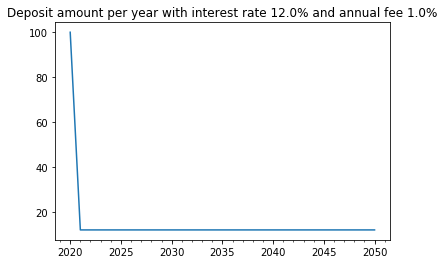

In [96]:
annual_interest_rate = 0.12
fee = 0.01
initial_amount = 100 
how_many_years = 30 
amount_per_year= interest_bank_logistic(fee, annual_interest_rate, initial_amount, how_many_years)
amount_per_year.plot(title='Deposit amount per year with interest rate '+repr(100*annual_interest_rate)+'% and annual fee '+repr(100*fee)+'%')

100%|██████████| 30/30 [00:00<00:00, 7980.54it/s]


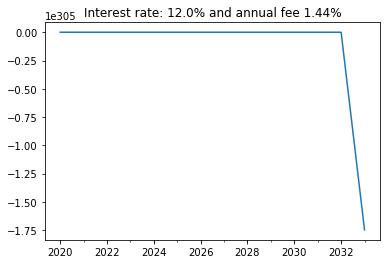

In [100]:
annual_interest_rate = 0.12
fee = annual_interest_rate**2
initial_amount = 100 
how_many_years = 30 
amount_per_year= interest_bank_logistic(fee, annual_interest_rate, initial_amount, how_many_years)
amount_per_year.plot(title='Ιnterest rate: '+repr(100*annual_interest_rate)+'% and annual fee '+repr(100*fee)+'%')

100%|██████████| 30/30 [00:00<00:00, 9340.05it/s]


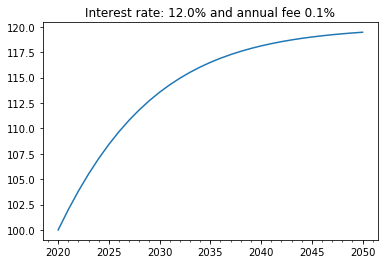

In [102]:
annual_interest_rate = 0.12
fee = 0.001
initial_amount = 100 
how_many_years = 30 
amount_per_year= interest_bank_logistic(fee, annual_interest_rate, initial_amount, how_many_years)
amount_per_year.plot(title='Ιnterest rate: '+repr(100*annual_interest_rate)+'% and annual fee '+repr(100*fee)+'%')

# 2-edge-connectivity
 

The algorithmic importance of depth first search was realized first by Tarjan and Hopcroft. Here is an example on how DFS can be used to find bridges in a small toy graph. Recall a bridge is an edge that does not lie on any simple cycle in G, i.e., its removal results in disconnecting the graph.  The key intution is that there are no back edges from descendants of a bridge to its ancestors. This is implemented by computing in linear time the following quantity for each node u: 

$ low(u) = \min( pushtime[u], \min( pushtime[x]: \text{there exists a backedge} (y,x), y \text{ is descendant of }u.$

In [128]:
class Graph:
    
    def __init__(self):
        self.graph = defaultdict(set) #multiple edges ignored
        self.time = 0
        self.color = []
        self.pred = []
        self.pushtime = []
        self.poptime = [] 
        self.n = 0 
        self.m = 0 
        self.low =[] 
        
    def read_graph(self, filename): 
        f = fopen(filename,'r')
        line = f.readline().split()
        self.n = int(line[0])
        self.m = int(line[1]) # first line of file is n m 
        for l in f: 
            endpoints = l.split()
            u = int(endpoints[0])
            v = int(endpoints[1])
            addEdge(u,v)
        
        
    def addEdge(self,u,v):
        self.graph[u].add(v)
        self.graph[v].add(u) #undirected 
        
    def print_adjacency_list(self):
        for i in self.graph.keys():
            print(repr(i)+':'+repr(self.graph[i]))
        

    def DFS(self):
        self.n = len(self.graph.keys())
        self.color = self.n*['WHITE']
        self.pred = self.n*[-1]
        self.pushtime  = self.n*[math.inf]
        self.poptime = self.n*[math.inf]
        self.low = self.n*[math.inf]
        for u in self.graph.keys(): 
            if self.color[u] == 'WHITE':
                self.DFS_visit(u)
        
        
    def DFS_visit(self,u): 
        self.time +=1 
        self.color[u]='GREY' 
        self.pushtime[u] = self.time 
        self.low[u] = self.pushtime[u]
        
        for v in self.graph[u]:
            if self.color[v] == 'WHITE':
                self.pred[v] =  u
                self.DFS_visit(v) 
                self.low[u]= np.minimum( self.low[u], self.low[v] )
                
            elif self.pred[u] !=  v:
                self.low[u]= np.minimum( self.low[u], self.pushtime[v] )
        self.color[u] = 'BLACK'
        self.time +=1 
        self.poptime[u] = self.time 
        
    def print_DFS_info(self):
        self.DFS()
        for u in self.graph.keys(): 
            print('Node ', u)
            print('Start time: ', self.pushtime[u]) 
            print('Finish time: ', self.poptime[u])
            
        
    def detect_bridge(self):
        self.DFS()
        for u in self.graph.keys(): 
            if(self.pred[u]!=-1):
                print('Edge : (',self.pred[u],u,'), Low[',u,']=',self.low[u], 'Pushtime[',u,']=',self.pushtime[u])
                if(self.low[u]==self.pushtime[u]):
                    print('Bridge : (',self.pred[u],u,')')

def toy_bridge():
    graph = Graph()    
    graph.addEdge(0,1)
    graph.addEdge(0,2)
    graph.addEdge(2,1)
    graph.addEdge(2,3) #bridge 
    graph.addEdge(3,4)
    graph.addEdge(3,5)
    graph.addEdge(4,5)
    graph.print_adjacency_list()
    graph.print_DFS_info()
    graph.detect_bridge()
toy_bridge()

0:{1, 2}
1:{0, 2}
2:{0, 1, 3}
3:{2, 4, 5}
4:{3, 5}
5:{3, 4}
Node  0
Start time:  1
Finish time:  12
Node  1
Start time:  2
Finish time:  11
Node  2
Start time:  3
Finish time:  10
Node  3
Start time:  4
Finish time:  9
Node  4
Start time:  5
Finish time:  8
Node  5
Start time:  6
Finish time:  7
Edge : ( 0 1 ), Low[ 1 ]= 13 Pushtime[ 1 ]= 14
Edge : ( 1 2 ), Low[ 2 ]= 13 Pushtime[ 2 ]= 15
Edge : ( 2 3 ), Low[ 3 ]= 16 Pushtime[ 3 ]= 16
Bridge : ( 2 3 )
Edge : ( 3 4 ), Low[ 4 ]= 16 Pushtime[ 4 ]= 17
Edge : ( 4 5 ), Low[ 5 ]= 16 Pushtime[ 5 ]= 18


### Notes 

- The above code essentially can give the two connected components of a graph (i.e., they contain no bridge). For a linear time 3-edge connectivity, see the reduction due to [Galil-Italiano](https://dl.acm.org/doi/abs/10.1145/122413.122416).
- [A Simple Algorithm for Finding All k-Edge-Connected Components
](https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0136264)

# Delta method 

In [17]:
def toyvariable(n=1000, experiments=100000): 
    y = []
    for i in range(experiments): 
        s = np.random.uniform(0,1,n) 
        y.append(np.mean(s)**2) 
    return y 

(array([1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        5.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 1.100e+01, 1.500e+01,
        1.000e+01, 1.800e+01, 1.900e+01, 2.100e+01, 3.300e+01, 5.200e+01,
        5.800e+01, 7.600e+01, 9.000e+01, 1.180e+02, 1.690e+02, 1.880e+02,
        2.210e+02, 3.210e+02, 3.780e+02, 4.060e+02, 5.260e+02, 6.160e+02,
        6.980e+02, 8.730e+02, 9.430e+02, 1.228e+03, 1.303e+03, 1.461e+03,
        1.718e+03, 1.786e+03, 2.001e+03, 2.155e+03, 2.399e+03, 2.513e+03,
        2.754e+03, 2.893e+03, 3.077e+03, 3.101e+03, 3.308e+03, 3.333e+03,
        3.441e+03, 3.408e+03, 3.426e+03, 3.477e+03, 3.314e+03, 3.326e+03,
        3.288e+03, 3.044e+03, 3.037e+03, 2.898e+03, 2.755e+03, 2.604e+03,
        2.309e+03, 2.272e+03, 2.017e+03, 1.824e+03, 1.647e+03, 1.469e+03,
        1.428e+03, 1.144e+03, 1.003e+03, 9.160e+02, 7.980e+02, 6.960e+02,
        6.120e+02, 5.200e+02, 4.350e+02, 3.880e+02, 2.820e+02, 2.400e+02,
        2.330e+02, 1.820e+02, 1.310e+0

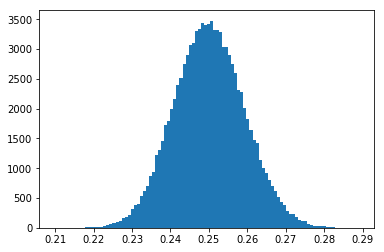

In [11]:
y = toyvariable()
plt.hist(y,100)

Understanding the limiting distribution of this random variable is a straightforward application of the δ-method. Specifically, $\bar{Y}_n = (\frac{X_1+\ldots+X_n}{n})^2= (\bar{X_n})^2$ where each $X_i \sim U(0,1)$. By the central limit theorem we know that 

$\frac{\sqrt{n} (\bar{X}_n - \frac{1}{2}) }{\sqrt{ \frac{1}{12} } } \sim N(0,1)$.  

Let $g(x)=x^2$. Notice that $g$ is differentiable and $g'(1/2)=2\cdot \frac{1}{2}=1 \neq 0$. Therefore, 

$\frac{\sqrt{n} (g(\bar{X}_n) - g(\frac{1}{2}) ) }{\sqrt{ \frac{1}{12} } }


In [15]:
np.var(y)*1000

0.08353976731993033

In [16]:
1/12

0.08333333333333333